In [1]:
import pandas as pd
import numpy as np
import yaml
%matplotlib inline

In [2]:
with open("param.yaml", "r") as file:
    param = yaml.load(file.read())
param

{'forget_bias': 1.0,
 'learning_rate': 0.1,
 'length_of_sequences': 50,
 'num_of_hidden_nodes': 4,
 'num_of_input_nodes': 1,
 'num_of_output_nodes': 1,
 'num_of_prediction_epochs': 100,
 'num_of_training_epochs': 2000,
 'optimizer': 'GradientDescentOptimizer',
 'seed': 0,
 'size_of_mini_batch': 100,
 'train_data_path': '../train_data/normal.npy'}

In [3]:
train = np.load(param["train_data_path"])
train

array([[  0.00000000e+00,   1.25333234e-01],
       [  1.25333234e-01,   2.48689887e-01],
       [  2.48689887e-01,   3.68124553e-01],
       ..., 
       [ -3.68124553e-01,  -2.48689887e-01],
       [ -2.48689887e-01,  -1.25333234e-01],
       [ -1.25333234e-01,   3.92877345e-15]])

In [4]:
initial = np.load("initial.npy")
initial

array([  0.00000000e+00,   1.25333234e-01,   2.48689887e-01,
         3.68124553e-01,   4.81753674e-01,   5.87785252e-01,
         6.84547106e-01,   7.70513243e-01,   8.44327926e-01,
         9.04827052e-01,   9.51056516e-01,   9.82287251e-01,
         9.98026728e-01,   9.98026728e-01,   9.82287251e-01,
         9.51056516e-01,   9.04827052e-01,   8.44327926e-01,
         7.70513243e-01,   6.84547106e-01,   5.87785252e-01,
         4.81753674e-01,   3.68124553e-01,   2.48689887e-01,
         1.25333234e-01,  -3.21624530e-16,  -1.25333234e-01,
        -2.48689887e-01,  -3.68124553e-01,  -4.81753674e-01,
        -5.87785252e-01,  -6.84547106e-01,  -7.70513243e-01,
        -8.44327926e-01,  -9.04827052e-01,  -9.51056516e-01,
        -9.82287251e-01,  -9.98026728e-01,  -9.98026728e-01,
        -9.82287251e-01,  -9.51056516e-01,  -9.04827052e-01,
        -8.44327926e-01,  -7.70513243e-01,  -6.84547106e-01,
        -5.87785252e-01,  -4.81753674e-01,  -3.68124553e-01,
        -2.48689887e-01,

In [5]:
output = np.load("output.npy")
output

array([ 0.01300612,  0.14269289,  0.26389512,  0.37760606,  0.48387495,
        0.58184886,  0.67041779,  0.75024784,  0.82346511,  0.89024734,
        0.9461937 ,  0.98375189,  0.99708796,  0.98564827,  0.95306802,
        0.90397108,  0.84202039,  0.76954663,  0.68783748,  0.59751284,
        0.49883077,  0.39193788,  0.27712443,  0.15513429,  0.02750632,
       -0.10319978, -0.23350781, -0.3595621 , -0.47790885, -0.58610457,
       -0.6828301 , -0.76750791, -0.83972347, -0.89882112, -0.94390404,
       -0.97415447, -0.98915982, -0.98898387, -0.97400367, -0.94469202,
       -0.90149498, -0.84484041, -0.77521652, -0.69321048, -0.59943056,
       -0.49441075, -0.37882268, -0.25418237, -0.12363175,  0.00814852,
        0.13636568,  0.25796035,  0.37210748,  0.47883782,  0.57736886,
        0.6665405 ,  0.74687517,  0.82047546,  0.88770187,  0.94438791,
        0.98303926,  0.99763048,  0.98735249,  0.95571828,  0.90736568,
        0.84602177,  0.77408195,  0.69287813,  0.60304952,  0.50

In [6]:
losses = np.load("losses.npy")
losses

array([[  1.00000000e+01,   5.21178484e-01],
       [  2.00000000e+01,   4.75007892e-01],
       [  3.00000000e+01,   3.98932010e-01],
       [  4.00000000e+01,   2.22336680e-01],
       [  5.00000000e+01,   7.35786483e-02],
       [  6.00000000e+01,   2.55758259e-02],
       [  7.00000000e+01,   9.14295018e-03],
       [  8.00000000e+01,   5.43729728e-03],
       [  9.00000000e+01,   3.29838810e-03],
       [  1.00000000e+02,   4.13168827e-03],
       [  1.10000000e+02,   3.82932182e-03],
       [  1.20000000e+02,   2.85577145e-03],
       [  1.30000000e+02,   3.04991123e-03],
       [  1.40000000e+02,   2.32677022e-03],
       [  1.50000000e+02,   1.98322325e-03],
       [  1.60000000e+02,   1.79492251e-03],
       [  1.70000000e+02,   1.74251711e-03],
       [  1.80000000e+02,   1.63180474e-03],
       [  1.90000000e+02,   1.45728095e-03],
       [  2.00000000e+02,   1.35194277e-03],
       [  2.10000000e+02,   1.26131997e-03],
       [  2.20000000e+02,   1.07836840e-03],
       [  

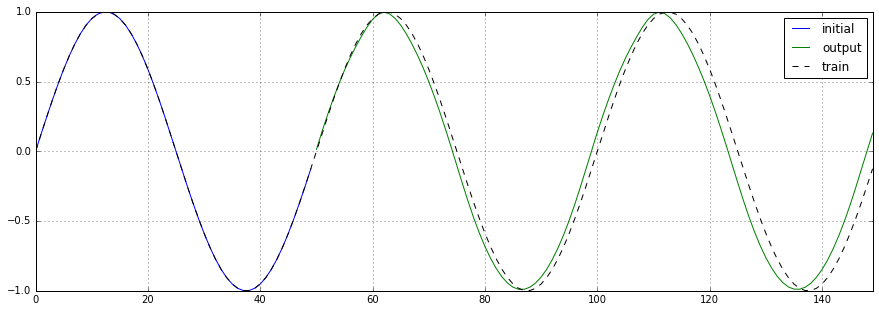

In [7]:
train_df = pd.DataFrame(train[:len(initial) + len(output), 0], columns=["train"])
initial_df = pd.DataFrame(initial, columns=["initial"])
output_df = pd.DataFrame(output, columns=["output"], index=range(len(initial), len(initial) + len(output)))
merged = pd.concat([train_df, initial_df, output_df])
merged.plot(figsize=(15, 5), grid=True, style=["-", "-", "k--"])

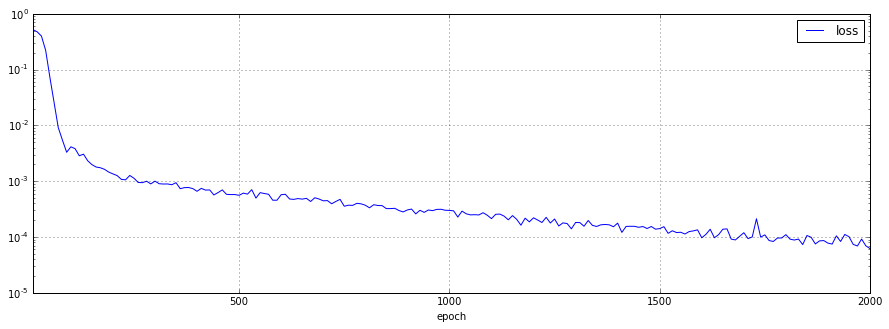

In [8]:
losses_df = pd.DataFrame(losses, columns=["epoch", "loss"])
losses_df.plot(figsize=(15, 5), grid=True, logy=True, x="epoch")